Ecole Normale Supérieure de l'Enseignement Technique - Mohammedia<br>
Master : Systèmes Distribués et Intelligence Artificielle<br>
Module : Bases de l'intellegence artificielle<br>
<b>IGUIDER Amine</b><br>
Année universitaire 2023 - 2024

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- **sepal_length** : Longeur du speal
- **petal_length** : Longeur du petal
- **sepal_width** : Largeur du speal
- **petal_width** : Largeur du petal

On élimine la 5ième colonne qui concerne la **class** pour éviter les problème de calcul.

In [128]:
iris.drop('class', axis=1, inplace=True)

<Axes: >

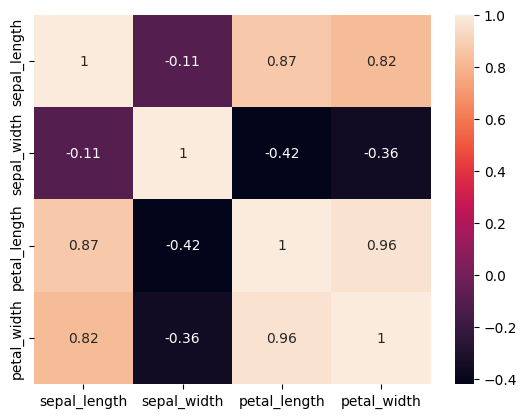

In [129]:
sns.heatmap(iris.corr(), annot=True)

À l'aide de la matrice de correlation, on peut bien distinger qu'il y'a une certain correction entre longeur du sépale et longeur du pétale $c = 0.87$.<br>

<Axes: xlabel='petal_length', ylabel='sepal_length'>

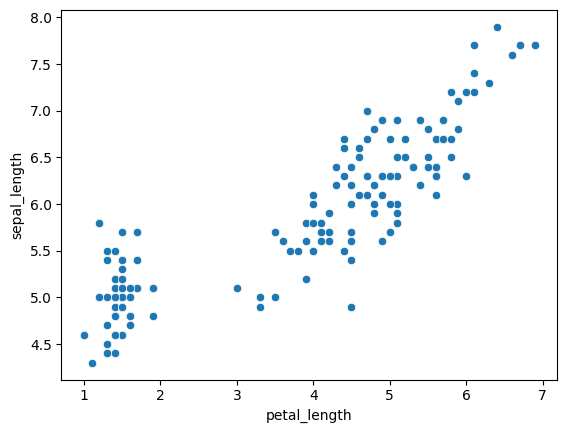

In [130]:
sns.scatterplot(x = 'petal_length', y='sepal_length', data=iris)

Pour une fleur iris $i$, on considère que $x^i$ représente **la longueur du pétale** et $y^i$ la longueur du sépale. Notre objectif est de prédire la valeur de **la longueur du sépale** en utilisant un modèle de régression linéaire $f$. Ainsi, nous obtenons :


\begin{equation}
y^i = f(x^i) = ax^i + b
\end{equation}
tels que $a, b \in \mathbb{R}$<br>
Le but est trouver les deux réels $a$ et $b$ tels que le modèle soit optimale et plus précis. Pour cela, on définit **la fonction coût** $J$ varie en fonction de $a$ et $b$, et elle permet de quantifier la marge d'erreur de note $f$ :
\begin{equation}
J(a, b) = \dfrac{1}{2m} \sum_{i=1}^m \left[\,f_{a,b}(x^i) - y\,\right]^2 = \dfrac{1}{2m} \sum_{i=1}^m (\,ax^i + b - y\,)^2
\end{equation}
où $m$ désigne le nombre du couple $(x^i, y^i)$
Il s'agit d'une fonction de $\mathbb{R}^2$ dans $\mathbb{R}$, elle forme dans l'espace un **paraboloïde**. Elle possède un seule minimum locale qui aussi un minimum global $(a_m, b_m)$, et on cherche à déterminer ce minimu<br/>
Pour chaque couple $(x^i, y^i)$, on peut obtenir le système suivant :
\begin{cases}
y^1 &= ax^1+b \\
   y^2 &= ax^2+b \\
   &\vdots\\
   y^m &= ax^m + b
\end{cases}
On traduit ce système à une écriture matricille.
\begin{align}
\begin{pmatrix}
x^1 & 1 \\
x^2 & 1 \\
\vdots & \vdots \\
x^m & 1
\end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} &= \begin{pmatrix} y^1 \\ y^2 \\ \vdots \\ y^m \end{pmatrix}\\\\
X\cdot\theta &= Y
\end{align}
La fonction coût peut être définit par :
\begin{equation}
J(\theta) = \dfrac{1}{2m} \left(X\cdot\theta - Y\right)^2
\end{equation}

Pour déterminer le $\theta_m = (a_m, b_m)$, on utilise la méthode du **déscente du gradient**. On donne $\theta_0 = (a_0, b_0)$ un vecteur de coordonnés donnés d'une manière aléatoire, et pour tout $n > 0$ :<br/>
\begin{equation} \theta_{n} = \theta_{n-1} - \alpha \cdot \nabla J(\theta_{n-1}) = \theta_{n-1} - \alpha \cdot \dfrac{1}{m} X^T \cdot (X\cdot\theta_{n-1}-Y) \end{equation}
Tels que $\alpha$ s'appelle le **coefficient d'apprentissage** qui représente le pas de descente vers le minimum cherché.<br/>
On repète ce processus pour $k$-itérations données pour suivre le taux d'apprentissage du modèle $f$.m là.

On commence à déterminer les données tels que la longuer du pétal et la longeur du sépal sous forme des matrices colonnes ainsi le nombre des lignes $m$

In [6]:
np.random.seed(0)

On commance à créer un classe qui nos permet de :
- Créer la matrix de $m$ lignes et 2 colonnes $X$ à partir des ($x_i$) donnée, et génerer une valeur initiale de $\theta_0$ aléatoirement
- Calculer la fonction coût et le gradient **nabla** pour $\theta_i$
- S'entrainer le modèle en donnant $\alpha$ et le nombre d'itérations $k$ afin de déterminer le meilleur $\theta$
- Récuperer l'évolution de la fonction coût et calculer enfin le cofficient de détermination
- Visualer les données avec les prédictions du modèle

In [177]:
class LinearRegressionModel:

    def __init__(self, x, y):
        self.m = len(y)
        self.x = x.reshape((self.m, 1))
        self.y = y.reshape((self.m, 1))
        self.X = np.hstack( (self.x, np.ones_like(self.x) ) )
        self.theta_0 = np.random.randn(2, 1)

    def nabla(self):
        return 1/self.m * self.X.T @ (self.X @ self.theta - self.y)

    def cost(self):
        return 1/(2*self.m) * ((self.X.dot(self.theta) - self.y) ** 2).sum()
    
    def train(self, k, a):
        self.cost_history = np.zeros(k)
        self.theta = self.theta_0
        for i in range(k):
            self.theta -= a * self.nabla()
            self.cost_history[i] = self.cost()

        self.pred = self.X @ self.theta
        u = ((self.y - self.pred)**2).sum()
        v = ((self.y - self.y.mean())**2).sum()
        self.coef_determination = 1 - u/v

    def plot(self):
        plt.plot(self.x, self.y, 'o')
        plt.plot(self.x, self.pred, c='r')
        plt.show()

In [168]:
x = iris.petal_length.values
Y = iris.sepal_length.values

De même, on définit le nombre d'itérations $k$, le coefficient d'apprentissage $\alpha$ (pratiquement, 0.01) et $\theta_0$ aléatoire

In [174]:
k = 5000
alpha = 0.01

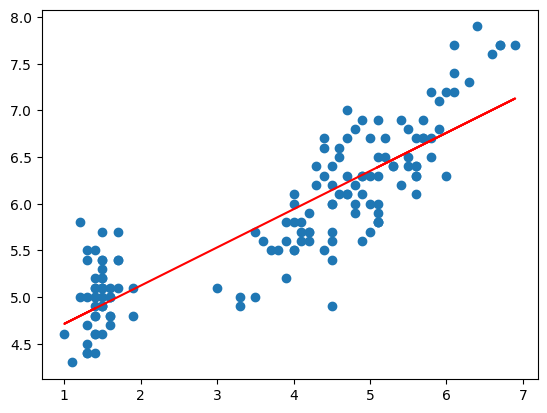

In [175]:
sp = LinearRegressionModel(x, Y)
sp.train(k, alpha)
sp.plot()

Pour chaque itération, on affiche l'évolution de la fonction coût

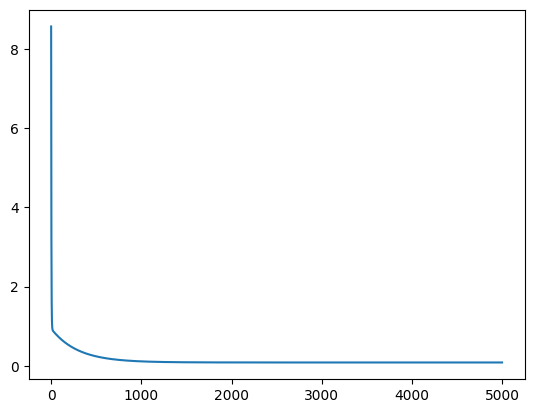

In [176]:
plt.plot(range(k), sp.cost_history)
plt.show()

## Analyse de la relation entre le correlation et le coefficient de détermination

Dans cette partie, on veut analysez la relation entre la valeur de la corrélation et la performance du modèle établi.

In [149]:
corr = iris.corr()

In [150]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [158]:
columns = iris.columns

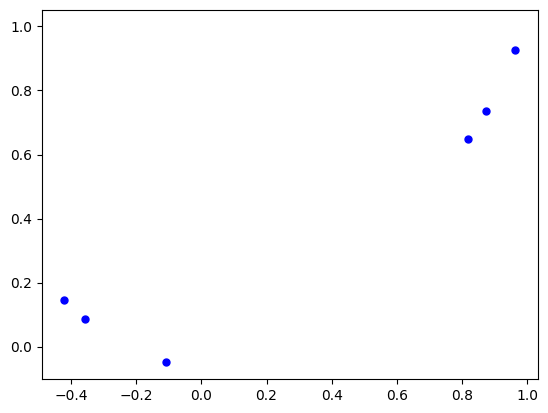

In [165]:
for idx, x in enumerate(columns):
    for y in columns[idx+1:]:
        d1 = iris[x].values
        d2 = iris[y].values
        model = LinearRegressionModel(d1, d2)
        model.train(a=0.01, k=7000)
        plt.plot(corr.at[x, y], model.coef_determination, "o", 1, markersize=5, markeredgecolor="blue", markerfacecolor="blue")

plt.show()

Il est évident de dire que le tant que la valeur absolute de la correction $|c|$ tant vers 1, le coefficient de détermination $R^2$ commance à s'approcher de 1. D'où, une forte correction produise un modèle très performant.